#Downloading data

In [2]:
!gdown 1478QVyS0DrBnHMRoWoqtSl-F0kDQrhsg

Downloading...
From: https://drive.google.com/uc?id=1478QVyS0DrBnHMRoWoqtSl-F0kDQrhsg
To: /content/filtered_paranmt.zip
100% 44.4M/44.4M [00:01<00:00, 23.6MB/s]


In [3]:
%%capture
!unzip filtered_paranmt.zip

In [4]:
!wget https://huggingface.co/datasets/s-nlp/paradetox/resolve/main/train.tsv

--2023-10-23 16:22:40--  https://huggingface.co/datasets/s-nlp/paradetox/resolve/main/train.tsv
Resolving huggingface.co (huggingface.co)... 13.35.166.50, 13.35.166.114, 13.35.166.36, ...
Connecting to huggingface.co (huggingface.co)|13.35.166.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2039815 (1.9M) [text/plain]
Saving to: ‘train.tsv’

train.tsv           100%[===================>]   1.95M  2.10MB/s    in 0.9s    

2023-10-23 16:22:42 (2.10 MB/s) - ‘train.tsv’ saved [2039815/2039815]



#Main Dataset exploration

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
filtered = pd.read_table('filtered.tsv')
filtered = filtered.drop([filtered.columns[i] for i in [0]], axis=1)

In [8]:
filtered.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


##Plotting some graphs

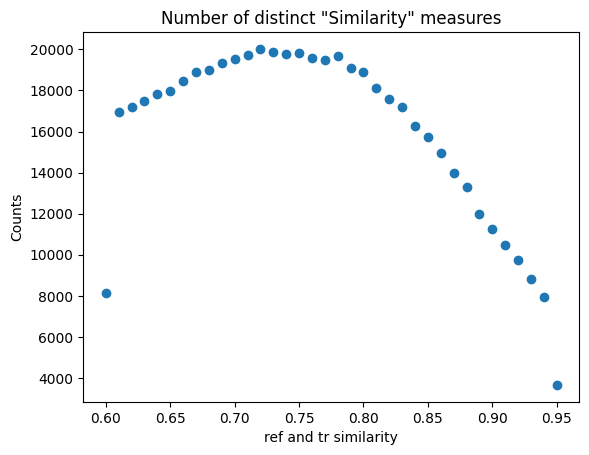

In [9]:
similarities = filtered['similarity'].values.round(2)
unique, counts = np.unique(similarities, return_counts=True)

plt.ylabel('Counts')
plt.xlabel('ref and tr similarity')
plt.title('Number of distinct "Similarity" measures')
plt.scatter(unique, counts)
plt.show()

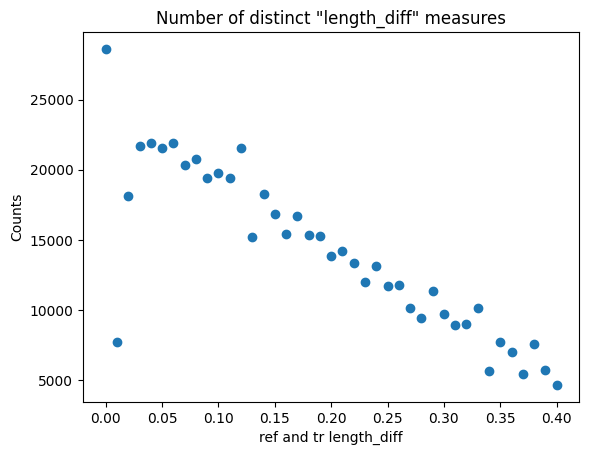

In [10]:
lengths = filtered['lenght_diff'].values.round(2)
unique, counts = np.unique(lengths, return_counts=True)

plt.ylabel('Counts')
plt.xlabel('ref and tr length_diff')
plt.title('Number of distinct "length_diff" measures')
plt.scatter(unique, counts)
plt.show()

True


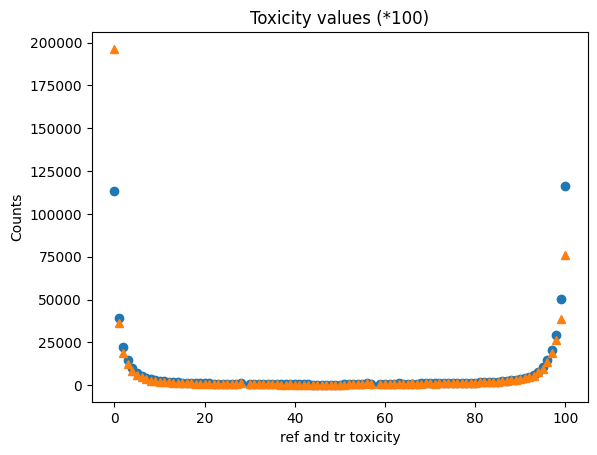

In [11]:
ref_tox = (filtered['ref_tox'].values.round(2) * 100).astype(int)
trn_tox = (filtered['trn_tox'].values.round(2) * 100).astype(int)

unique, counts = np.unique(ref_tox, return_counts=True)
unique2, counts2 = np.unique(trn_tox, return_counts=True)

print(unique.shape == counts.shape)
plt.ylabel('Counts')
plt.xlabel('ref and tr toxicity')
plt.title('Toxicity values (*100)')
plt.plot(unique.flatten(), counts.flatten(), 'o')
plt.plot(unique2, counts2, '^')
plt.show()

##Checking how many samples I could filter out by conditioning and what lengths do sentences have

In [12]:
len(filtered[(filtered['ref_tox'] > 0.95) & (filtered['trn_tox'] < 0.01)])

170657

<ipython-input-15-c261d1937174>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered2['length'] = [len(x.split()) for x in filtered2['reference'].values]


<Axes: >

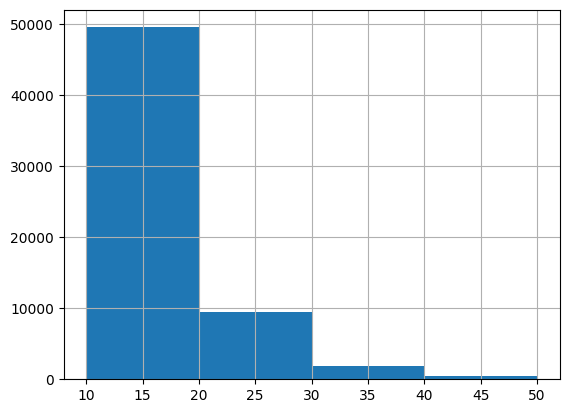

In [15]:
filtered2 = filtered[(filtered['ref_tox'] > 0.97) & (filtered['trn_tox'] < 0.01)]
filtered2['length'] = [len(x.split()) for x in filtered2['reference'].values]
filtered2['length'].hist(bins=[i*10 for i in range(1, 6)])

In [18]:
print(filtered.sort_values(by='ref_tox', ascending=False)[:5]['translation'].values)

['his father would have answered with his thunder voice from this blunt machine.'
 'you have to get those guys back there.' 'Salina could be with the cop.'
 "don't let them fool you in radiology."
 'my friend here took a marijuana...']


In [19]:
print(filtered.sort_values(by='ref_tox', ascending=False)[:5]['reference'].values)

['His father would have used a booming voice to wrench a reply from this stupid machine.'
 'You have to send those idiots back in.'
 'Salina could be with that stupid cop.'
 "And don't let those idiots in radiology hold you up."
 'My idiot friend here brought marijuana... - on the plane.']


Translation quality sometimes seems weird for me in this dataset, so I will try to find an additional one

In [20]:
for i in range(10):
    idx = np.random.randint(0, len(filtered) - 1)
    print(f"{filtered.iloc[idx]['ref_tox']:.3f}, ': ', {filtered.iloc[idx, 0]}")
    print(f"{filtered.iloc[idx]['trn_tox']:.3f}, ': ', {filtered.iloc[idx, 1]}\n")

0.346, ': ', I'm not the one who bet the Taj on a bloody horse!
0.998, ': ', it's not me who put the Taj in the fucking race!

0.005, ': ', Unless... it gets to the old woman in time, in which case she sucks out the poison, turning her into the Grand Empress:
0.982, ': ', if, of course, he doesn't get the staffer in time, in which case she is going to suck the poison out of him, and he will turn himself into a Vicious Empress:

0.005, ': ', That's probably what got him killed.
0.959, ': ', they probably killed him for that.

0.021, ': ', Schmuck, it's all for us.
0.998, ': ', fool, it's all ours.

0.989, ': ', I think I'd make a dead sexy zombie.
0.407, ': ', I think I'd be a deadly zombie.

0.020, ': ', 'Voldemort tried to kill you when you were a child because of a prophecy made shortly before your birth.
0.938, ': ', "Voldemort once tried to kill you for a prophecy that was uttered shortly before your birth.

0.999, ': ', You give me a quality car,bet your ass,I could still close 'e

#New dataset exploration

In [21]:
!wget https://huggingface.co/datasets/s-nlp/paradetox/resolve/main/train.tsv

--2023-10-23 16:28:02--  https://huggingface.co/datasets/s-nlp/paradetox/resolve/main/train.tsv
Resolving huggingface.co (huggingface.co)... 13.35.166.36, 13.35.166.50, 13.35.166.114, ...
Connecting to huggingface.co (huggingface.co)|13.35.166.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2039815 (1.9M) [text/plain]
Saving to: ‘train.tsv.1’

train.tsv.1         100%[===================>]   1.95M  2.11MB/s    in 0.9s    

2023-10-23 16:28:03 (2.11 MB/s) - ‘train.tsv.1’ saved [2039815/2039815]



In [22]:
data = pd.read_table('train.tsv')
data.rename(columns={"en_toxic_comment": "reference", "en_neutral_comment": 'translation'}, inplace=True)
print(len(data))
data.head()

19744


,reference,translation
0,he had steel balls too !,he was brave too!
1,"dude should have been taken to api , he would ...",It would have been good if he went to api. He ...
2,"im not gonna sell the fucking picture , i just...","I'm not gonna sell the picture, i just want to..."
3,the garbage that is being created by cnn and o...,the news that is being created by cnn and othe...
4,the reason they dont exist is because neither ...,The reason they don't exist is because neither...


This dataset seems to be much better in terms of translation quality, as it was comprised using crowdsourcing

In [23]:
for i in range(10):
    idx = np.random.randint(0, len(data) - 1)
    print(f"{data.iloc[idx, 0]}")
    print(f"{data.iloc[idx, 1]}\n")

and he doesn 't know what the fuck 71 chan is ?
and he doesn 't know what 71 chan is ?

this is exactly why politics is so fucked .
This is exactly why politics is so bad

cant deal with stuck on stupid .
Can't deal a bad person.

lets throw some pies at these cunts
Lets throw some pies at them

who cares loser lib troll , they are all so pathetic and incompetent and corrupt they should resign period
Who cares, they are incapable and not suitable, they should resign period.

- < 10 , and i dont know who the fuck lied to you !
- < 10 , and i dont know who lied to you !

make yourself sane for the first time , get some help for your hate and stupidity
Make yourself sane for the first time , get some help for yourself

when the fuck did the republican party cross the pacific ? ? !
When did the republican party cross the pacific?

president trump should be applauded for refusing to sign this ridiculous statement .
President trump should be appreciated not to sign such bad statement.

it 's